<a href="https://colab.research.google.com/github/David-S-Botero/BinaryClassificationWithNumpy/blob/main/Neural_Network_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [82]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov = 0.1,
                        n_samples= N,
                        n_features = 2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)
gaussian_quantiles

(array([[ 0.24561546, -0.40282745],
        [-0.07631188, -0.28808831],
        [ 0.12207482, -0.00516995],
        ...,
        [ 0.23956009,  0.01956019],
        [ 0.0903298 , -0.08022778],
        [ 0.10527223, -0.13154615]]),
 array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 

In [83]:
gaussian_quantiles[0].shape

(1000, 2)

In [84]:
gaussian_quantiles[1].shape

(1000,)

In [85]:
X, Y = gaussian_quantiles

In [86]:
Y = Y[:,np.newaxis]

Text(0, 0.5, 'feature 2')

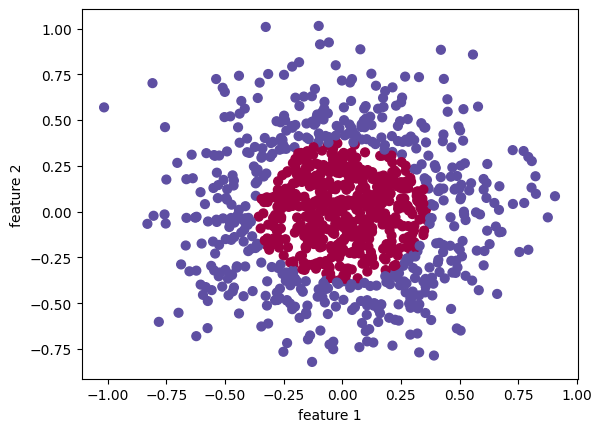

In [87]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0],s=40,cmap=plt.cm.Spectral)
plt.xlabel('feature 1')
plt.ylabel('feature 2')


In [88]:
#Activation Functions
def sigmoid(x, derivative = False):
  if derivative:
    return np.exp(-x)/((np.exp(-x)+1)**2)
  else:
    return 1/(1+np.exp(-x))

def relu(x, derivative=False):
  if derivative:
    x[x<=0] = 0
    x[x>0] = 1
    return x
  else:
    return np.maximum(0,x)


In [89]:
#Loss function
def mse(y,y_hat,derivative=False):
  if derivative:
    return y-y_hat
  else:
    return np.mean((y-y_hat)**2)


In [90]:
def initialize_param_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0,L-1):
    parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) -1
    parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) -1
  return parameters

In [91]:
X@params['W1']

array([[[-6.72853452e-02,  2.52869454e-01, -2.19564626e-01,
          6.29929496e-02],
        [-5.02857665e-02,  6.85257197e-02, -2.24781673e-01,
          5.88453611e-02],
        [ 1.58563073e-04,  5.62566270e-02,  2.91615458e-02,
         -5.70243043e-03],
        ...,
        [ 5.42866337e-03,  9.98246993e-02,  7.82887045e-02,
         -1.68274001e-02],
        [-1.30447281e-02,  6.88221075e-02, -3.25925838e-02,
          1.02784803e-02],
        [-2.17570779e-02,  9.37492477e-02, -6.49602089e-02,
          1.91985209e-02]],

       [[-6.72853452e-02,  2.58764180e-01, -2.17852952e-01,
          6.29929496e-02],
        [-5.02857665e-02,  7.02599047e-02, -2.22932302e-01,
          5.88453611e-02],
        [ 1.58563073e-04,  5.75034977e-02,  2.88884158e-02,
         -5.70243043e-03],
        ...,
        [ 5.42866337e-03,  1.02015249e-01,  7.75815443e-02,
         -1.68274001e-02],
        [-1.30447281e-02,  7.04039659e-02, -3.23544464e-02,
          1.02784803e-02],
        [-2.175

In [92]:
def train(x, learn_rate, params, train = True):
  #Forward
  params['A0'] = x
  params['Z1'] = params['A0']@params['W1'] + params['b1']
  params['A1'] = relu(params['Z1'])

  params['Z2'] = params['A1']@params['W2'] + params['b2']
  params['A2'] = relu(params['Z2'])

  params['Z3'] = params['A2']@params['W3'] + params['b3']
  params['A3'] = sigmoid(params['Z3'])

  output = params['A3']

  if train:
    #Backpropagation
    params['dZ3'] = mse(Y,output,True)*sigmoid(params['A3'],True)
    params['dW3'] = params['A2'].T@params['dZ3']

    params['dZ2'] = params['dZ3']@params['W3'].T * relu(params['A2'],True)
    params['dW2'] = params['A1'].T@params['dZ2']

    params['dZ1'] = params['dZ2']@params['W2'].T * relu(params['A1'],True)
    params['dW1'] = params['A0'].T@params['dZ1']

    #Gradient Descent 
    params['W3'] = params['W3'] - params['dW3'] * learn_rate
    params['b3'] = params['b3'] - np.mean(params['dW3'],axis=0, keepdims=True)

    params['W2'] = params['W2'] - params['dW2'] * learn_rate
    params['b2'] = params['b2'] - np.mean(params['dW2'],axis=0, keepdims=True)

    params['W1'] = params['W1'] - params['dW1'] * learn_rate
    params['b1'] = params['b1'] - np.mean(params['dW1'],axis=0, keepdims=True)

  return output

In [ ]:
layers_dims = [2,4,8,1]
params = initialize_param_deep(layers_dim=layers_dims)
errors = []

for _ in range(30000):
  output = train(X,0.00001,params)
  if(_%50==0):
    print(mse(Y,output))
    errors.append(mse(Y,output))